### Βήμα 3: Classification δεδομένων

#### Βιβλιοθήκες

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score
from xgboost import XGBClassifier

#### Φόρτωση δεδομένων

In [66]:
bank_data = pd.read_csv('../data_preprocessing/clean_data.csv')
# Get rid of unwanted extra column
bank_data.drop('Unnamed: 0', axis=1, inplace=True)

### 1ος Ταξινομητής: Bayesian

#### Encoding κατηγορικών χαρακτηριστικών

In [67]:
le = LabelEncoder()
categorical_columns = ['job','marital','education','default','housing','loan','month','y']

for column in categorical_columns:
    bank_data[column] = le.fit_transform(bank_data[column])

#### Διαχωρισμός εξαρτημένων(y) και ανεξάρτηων μεταβλητών

In [68]:
X = bank_data.iloc[:,:-1].values
y = bank_data.iloc[:,-1].values

#### Split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=True)

#### Κανονικοποίηση

In [70]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Εκπαίδευση του Bayesian ταξινομητή

In [71]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [72]:
y_prediction = classifier.predict(X_test)
print(np.concatenate((y_prediction.reshape(len(y_prediction), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Αξιολόγηση ταξινομητή

#### Accuracy Score

In [73]:
accuracy_score(y_test, y_prediction)

0.8864177097341471

#### Classification Report

In [74]:
print(f'Classification Report: \n{classification_report(y_test, y_prediction)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      8843
           1       0.33      0.33      0.33       824

    accuracy                           0.89      9667
   macro avg       0.64      0.64      0.64      9667
weighted avg       0.89      0.89      0.89      9667



#### Confusion Matrix

<Axes: >

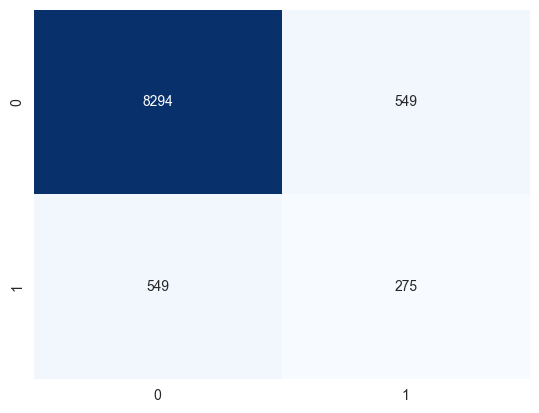

In [76]:
cf_matrix = confusion_matrix(y_test, y_prediction)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

#### AUC/ROC curve

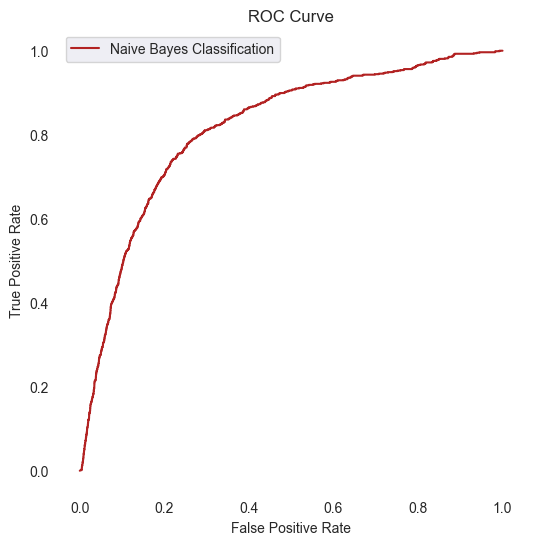

In [77]:
# Plot AUC/ROC curve
y_pred_proba = classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Naive Bayes Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend();

### 2ος Ταξινομητής: XGBoost

In [78]:
xgb_bank_data = pd.read_pickle("../data_preprocessing/clean-bank-data.pickle")

X_train_xgb, y_train_xgb, X_val_xgb, y_val_xgb, X_test_xgb, y_test_xgb, scaler_xgb = xgb_bank_data['X_train'], xgb_bank_data['y_train'], xgb_bank_data['X_val'], xgb_bank_data['y_val'], xgb_bank_data['X_test'], xgb_bank_data['y_test'], xgb_bank_data['scaler'] 
y_train_enc = (labelenc := LabelEncoder()).fit_transform(y_train)
y_val_enc, y_test_enc = labelenc.transform(y_val_xgb), labelenc.transform(y_test)

In [79]:
X_train_xgb

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
13742,0.248081,False,-0.182373,False,True,0.782751,-0.282431,0.652218,-0.424315,-0.308772,...,False,False,False,True,False,False,False,False,False,False
12154,-0.250700,False,-0.679317,True,False,-0.549649,0.899350,-0.857090,-0.424315,-0.308772,...,False,False,False,True,False,False,False,False,False,False
23911,-0.948994,False,-0.218431,True,False,1.630642,0.297716,-0.857090,2.105073,1.762418,...,False,False,True,False,False,False,False,False,False,False
33502,0.547350,False,-0.392165,True,False,0.298242,-1.048797,0.652218,2.990359,2.280215,...,False,False,False,False,False,False,True,False,False,False
24890,-1.547531,False,0.314898,False,False,-1.518667,-0.003101,-0.857090,-0.424315,-0.308772,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5623,-0.450212,False,-0.640965,True,False,1.388387,0.104334,-0.857090,-0.424315,-0.308772,...,False,False,False,False,False,False,True,False,False,False
15363,-0.350456,False,0.920016,True,True,1.751769,2.403434,1.406872,-0.424315,-0.308772,...,False,False,False,True,False,False,False,False,False,False
14670,-0.450212,False,-0.142710,True,True,1.146133,0.304879,0.652218,-0.424315,-0.308772,...,False,False,False,True,False,False,False,False,False,False
5921,-0.051187,False,-0.483293,True,False,1.509515,-0.382703,-0.102436,-0.424315,-0.308772,...,False,False,False,False,False,False,True,False,False,False


In [83]:
xgboost_classifier = XGBClassifier(n_estimators=25, n_jobs=1)
xgboost_classifier.fit(X_train_xgb, y_train_enc, eval_set=[(X_val_xgb, y_val_enc)], verbose=False)

XGBoostError: [21:10:14] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\data\data.cc:508: Check failed: this->labels.Size() % this->num_row_ == 0 (5800 vs. 0) : Incorrect size for labels.